# Robust estimation of kriging hyperparameters

In this example we are going to create a kriging metamodel with robust estimation of the hyperparameters.

Here

$$h(x) = cos(x_1 + x_2)$$

In [1]:
from __future__ import print_function
import openturns as ot

In [2]:
# prepare some X/Y data
ot.RandomGenerator.SetSeed(0)
dimension = 2
input_names = ['x1', 'x2']
formulas = ['cos(x1 + x2)']
model = ot.SymbolicFunction(input_names, formulas)
distribution = ot.Normal(dimension)
x  = distribution.getSample(30)
y = model(x)

In [3]:
# choose a covariance model
covarianceModel = ot.SquaredExponential([0.1]*dimension, [1.0])

# choose a parametrization in which the scale is optimized
covarianceModel.setScaleParametrization(ot.CovarianceModelImplementation.STANDARD)
#covarianceModel.setScaleParametrization(ot.CovarianceModelImplementation.INVERSE)
#covarianceModel.setScaleParametrization(ot.CovarianceModelImplementation.LOGINVERSE)
print("parameter=", covarianceModel.getParameter())

parameter= [0.1,0.1,1]


In [4]:
# create a kriging model
basis = ot.ConstantBasisFactory(dimension).build()
algo = ot.KrigingAlgorithm(x, y, covarianceModel, basis)

In [5]:
# choose a prior type
algo.setScalePrior(ot.GeneralLinearModelAlgorithm.JOINTLYROBUST)
# or algo.setScalePrior(ot.GeneralLinearModelAlgorithm.REFERENCE)

In [6]:
algo.run()
result = algo.getResult()
responseSurface = result.getMetaModel()

In [7]:
print("optimized parameter=", result.getCovarianceModel().getParameter())

optimized parameter= [1.97545,2.11943]


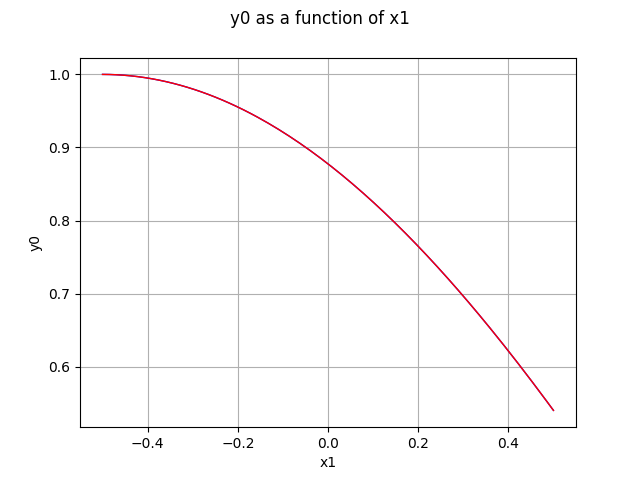

In [8]:
# plot 2nd output of our model with x1=0.5
graph = ot.ParametricFunction(responseSurface, [0], [0.5]).draw(-0.5, 0.5)
curve = ot.ParametricFunction(model, [0], [0.5]).draw(-0.5, 0.5).getDrawable(0)
curve.setColor('red')
graph.add(curve)
graph